In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from scipy.spatial import transform


In [121]:
dict = joblib.load('data/demo_gymnasts.pkl')

In [122]:
frames = list(dict.keys())
print(frames[0])

outputs//_DEMO/gymnasts/img/000001.jpg


In [123]:
params = list(dict.get(frames[0]).keys())

In [124]:
joints_2d = dict.get(frames[0]).get('2d_joints')

In [125]:
def get_2d_joints(dict):
    frames = list(dict.keys())
    joints_2d = []
    for frame in frames:
        joints_2d.append(dict.get(frame).get('2d_joints'))
    
    #reshape to (frames, 90)
    joints_2d = np.array(joints_2d)
    joints_2d = joints_2d.reshape(joints_2d.shape[0], -1)
    
    return np.array(joints_2d)

def get_smpl(dict):
    frames = list(dict.keys())
    joints_2d = []
    for frame in frames:
        joints_2d.append(dict.get(frame).get('smpl')[0])
    
    # #reshape to (frames, 90)
    # joints_2d = np.array(joints_2d)
    # joints_2d = joints_2d.reshape(joints_2d.shape[0], -1)
    
    return np.array(joints_2d)

In [126]:
smpl_frames = np.array([get_smpl(dict)[i]['body_pose'][7] for i in range(len(get_smpl(dict)))])

joints = [smpl_frames[i] for i in range(len(smpl_frames))]

# smpl = get_smpl(dict)[0]['body_pose']
# smpl[7]
# print(joints)

joints_x = []
joints_y = []
joints_z = []

for i in range(len(joints)):
    r = transform.Rotation.from_matrix(joints[i])
    r = r.as_euler('xyz', degrees=False)
    
    joints_x.append(r[0])
    joints_y.append(r[1])
    joints_z.append(r[2])
    
# plt.plot(joints)
# plt.show()

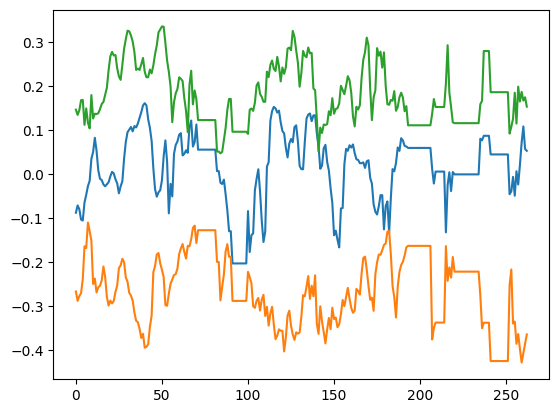

In [127]:
plt.plot(joints_x)
plt.plot(joints_y)
plt.plot(joints_z)

In [128]:
smpl_frames = np.array([get_smpl(dict)[i]['body_pose'] for i in range(len(get_smpl(dict)))])

smpl_joint_frames = []

for frame in smpl_frames:
    
    joints_x = []
    joints_y = []
    joints_z = []
    
    for joint in frame:
        r = transform.Rotation.from_matrix(joint)
        r = r.as_euler('xyz', degrees=False)

        joints_x.append(r[0])
        joints_y.append(r[1])
        joints_z.append(r[2])
    
    smpl_joint_frames.append([joints_x, joints_y, joints_z])

smpl_joint_frames = np.array(smpl_joint_frames)
#reshape to (frames, 23, 3)
# smpl_joint_frames = smpl_joint_frames.reshape(smpl_joint_frames.shape[0], 23, 3)
print(smpl_joint_frames.shape)

(263, 3, 23)


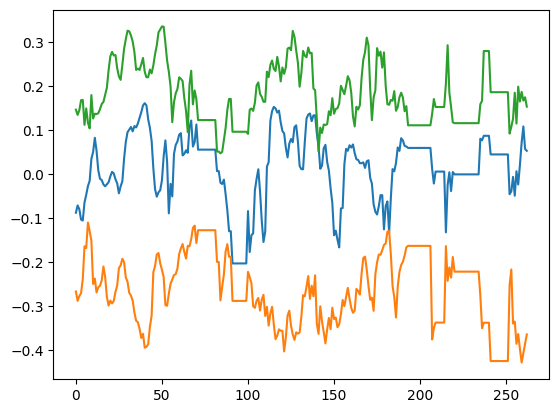

In [132]:
plt.plot(smpl_joint_frames[:, 0, 7])
plt.plot(smpl_joint_frames[:, 1, 7])
plt.plot(smpl_joint_frames[:, 2, 7])


In [133]:
#swap dimensions of smpl_joint_frames to (frames, 23, 3)
smpl_joint_frames = np.swapaxes(smpl_joint_frames, 1, 2)

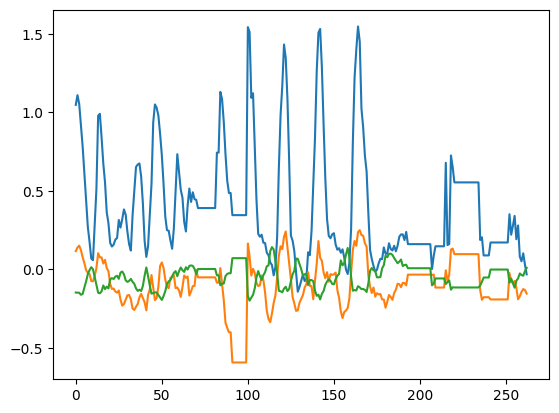

In [151]:
plt.plot(smpl_joint_frames[:, 3, 0])
plt.plot(smpl_joint_frames[:, 3, 1])
plt.plot(smpl_joint_frames[:, 3, 2])

In [166]:
#convert to joints to dataframe, by resizinng to (frames, 23*3)
smpl_joint_frames_df = smpl_joint_frames.reshape(smpl_joint_frames.shape[0], -1)
smpl_joint_frames_df = pd.DataFrame(smpl_joint_frames_df)

#get column names from SMPL model joint names

column_names = []

SMPL_JOINT_NAMES = [
#    "pelvis",
    "left_hip",
    "right_hip",
    "spine1",
    "left_knee",
    "right_knee",
    "spine2",
    "left_ankle",
    "right_ankle",
    "spine3",
    "left_foot",
    "right_foot",
    "neck",
    "left_collar",
    "right_collar",
    "head",
    "left_shoulder",
    "right_shoulder",
    "left_elbow",
    "right_elbow",
    "left_wrist",
    "right_wrist",
    "left_hand",
    "right_hand",
]


for i in SMPL_JOINT_NAMES:
    column_names.append(f'{i}_x')
    column_names.append(f'{i}_y')
    column_names.append(f'{i}_z')

smpl_joint_frames_df.columns = column_names

print(len(column_names))

69


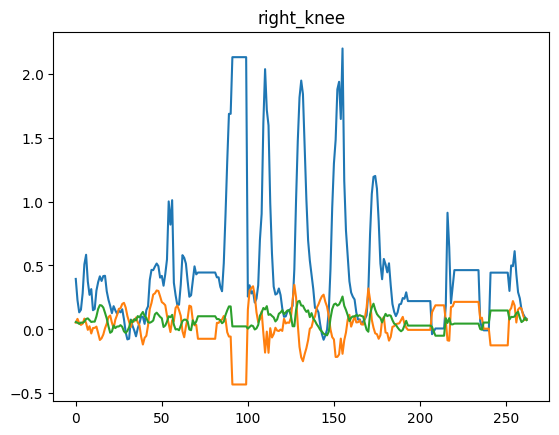

In [192]:

plot_col = 4

plt.plot(smpl_joint_frames_df[f'{SMPL_JOINT_NAMES[plot_col]}_x'])
plt.plot(smpl_joint_frames_df[f'{SMPL_JOINT_NAMES[plot_col]}_y'])
plt.plot(smpl_joint_frames_df[f'{SMPL_JOINT_NAMES[plot_col]}_z'])

plt.title(f'{SMPL_JOINT_NAMES[plot_col]}')

plt.show()